In [96]:
import pandas as pd
import numpy as np
df1 = pd.read_csv('../../../data/round-1-island-data-bottle/trades_round_1_day_-2.csv', delimiter=';')
df2 = pd.read_csv('../../../data/round-1-island-data-bottle/trades_round_1_day_-1.csv', delimiter = ';')
df3 = pd.read_csv('../../../data/round-1-island-data-bottle/trades_round_1_day_0.csv', delimiter = ';')

df = pd.concat([df1, df2, df3])

In [97]:
def extract_product_df(df, symbol: str):
    df_product = df[df['symbol'] == symbol]
    return df_product

In [98]:
df_ink = extract_product_df(df, 'SQUID_INK')
df_ink0 = extract_product_df(df1, 'SQUID_INK')
df_ink1 = extract_product_df(df2, 'SQUID_INK')
df_ink2 = extract_product_df(df3, 'SQUID_INK')

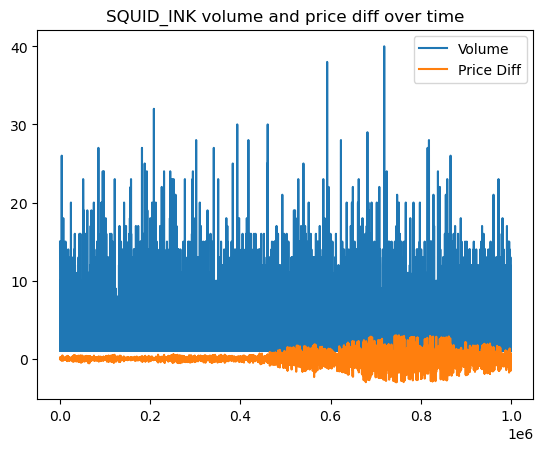

In [70]:
import matplotlib.pyplot as plt
plt.title('SQUID_INK volume and price diff over time')
plt.plot(df_ink['quantity'], label = 'Volume')
plt.plot(df_ink['uniform_price_diff'], label = 'Price Diff')
plt.legend()
plt.show()

In [112]:
def preprocess(df):
    df = df.copy()
    df = df.groupby('timestamp').agg({
        'price': 'mean',
        'quantity': 'sum',
        'buyer': 'first', 
        'seller': 'first', 
        'symbol': 'first', 
        'currency': 'first'
    })

    #计算price_diff
    df['price_diff'] = df['price'].diff(-1)
    #计算10timestamp波动率
    df['vol_10'] = df['price'].rolling(window=10).std()

    #计算vol_10的ma10
    df['vol_10_ma10'] = df['vol_10'].rolling(window=10).mean()

    df['timestamp'] = df.index

    df['price_diff'] = df['price'].diff(-1) # 计算后一个时间点的价格减前一个时间点的价格

    # 计算时间间隔（后一个timestamp减前一个timestamp）
    df['time_interval'] = df['timestamp'].diff(-1).abs()  # 取绝对值

    # 计算均匀的price_diff
    df['uniform_price_diff'] = df['price_diff'] / df['time_interval']

    # 处理NaN值（如最后一个时间点没有后续时间间隔的情况）
    df['uniform_price_diff'] = df['uniform_price_diff'].fillna(0)
    return df


In [113]:
df_ink = preprocess(df_ink)
df_ink0 = preprocess(df_ink0)
df_ink1 = preprocess(df_ink1)
df_ink2 = preprocess(df_ink2)

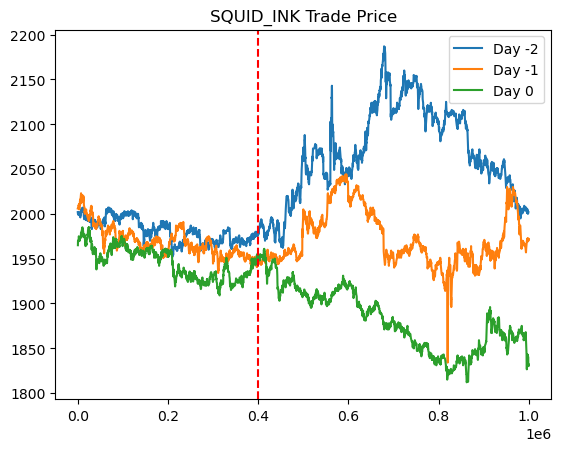

In [109]:
plt.title('SQUID_INK Trade Price')
plt.plot(df_ink0['price'], label = 'Day -2')
plt.plot(df_ink1['price'], label = 'Day -1')
plt.plot(df_ink2['price'], label = 'Day 0')
plt.axvline(x = 0.4 * 1e6, color = 'r', linestyle = '--')
plt.legend()

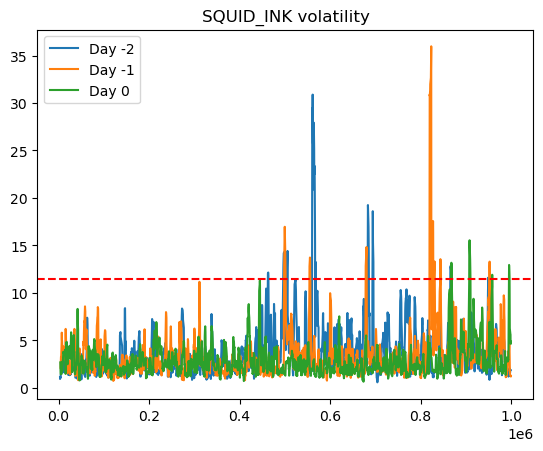

In [110]:
plt.title('SQUID_INK volatility')
plt.plot(df_ink0['vol_10'], label = 'Day -2')
plt.plot(df_ink1['vol_10'], label = 'Day -1')
plt.plot(df_ink2['vol_10'], label = 'Day 0')
#横线
plt.axhline(y=11.5, color='r', linestyle='--')
plt.legend()

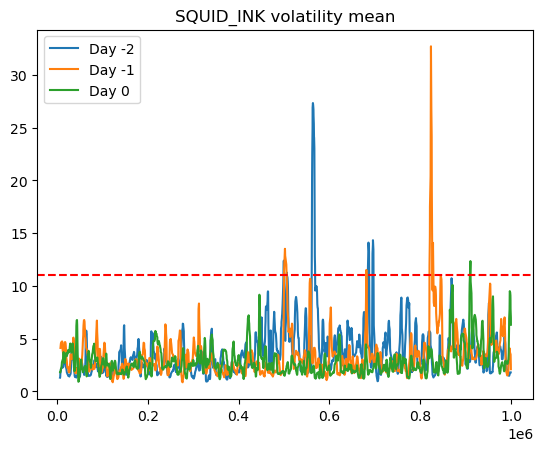

In [115]:
plt.title('SQUID_INK volatility mean')
plt.plot(df_ink0['vol_10_ma10'], label = 'Day -2')
plt.plot(df_ink1['vol_10_ma10'], label = 'Day -1')
plt.plot(df_ink2['vol_10_ma10'], label = 'Day 0')
#横线
plt.axhline(y=11, color='r', linestyle='--')
plt.legend()

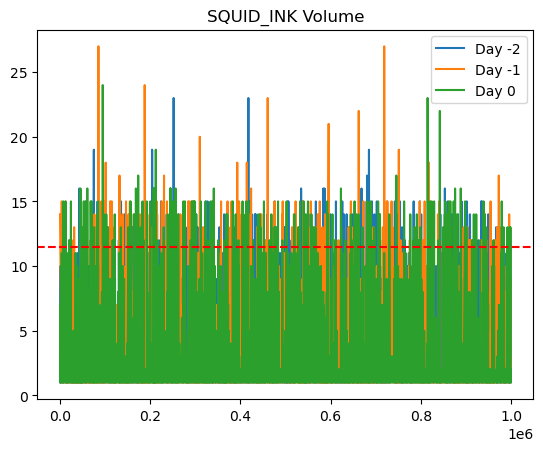

In [111]:
plt.title('SQUID_INK Volume')
plt.plot(df_ink0['quantity'], label = 'Day -2')
plt.plot(df_ink1['quantity'], label = 'Day -1')
plt.plot(df_ink2['quantity'], label = 'Day 0')

#横线
plt.axhline(y=11.5, color='r', linestyle='--')
plt.legend()